In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
import time

In [2]:
traffic_df = pd.read_csv("TrafficDataset2024_0626.csv")
traffic_df

,date,lat,lng,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,confidence,street,description
0,2024-06-17T10:30,34.026134,-118.476072,FRC5,14,22,63,40,false,1.000000,Highway Two,South-East of Colorado Ave and 20th ct
1,2024-06-17T10:30,34.025625,-118.477830,FRC5,19,23,88,71,false,0.996659,Highway Two,North of Colordao Ave and 19th St
2,2024-06-17T10:30,34.027802,-118.474187,FRC5,14,22,63,40,false,1.000000,Highway Two,South-West of Colorado Ave and Cloverfield Blvd
3,2024-06-17T10:30,34.034930,-118.463976,FRC5,14,19,118,84,false,1.000000,Highway Two,West of Iowa Ave and S Centinela Ave
4,2024-06-17T10:30,34.040547,-118.447410,FRC6,13,13,91,91,false,1.000000,Highway Two,South-East of Missouri Ave and Butler Ave
...,...,...,...,...,...,...,...,...,...,...,...,...
14887,2024-06-26T13:00,34.043089,-118.463707,FRC5,21,23,59,53,false,1.000000,Bundy Dr,North-East of Rochester Ave and S Saltair Ave
14888,2024-06-26T13:00,34.035352,-118.455888,FRC5,22,29,124,92,false,1.000000,Bundy Dr,South-East of Missouri Ave and Brockton Ave
14889,2024-06-26T13:00,34.049826,-118.460853,FRC5,11,17,130,86,false,1.000000,Barrington Ave,North of Willshire Blvd and S Barrington Ave
14890,2024-06-26T13:00,34.045697,-118.457263,FRC5,14,19,126,89,false,1.000000,Barrington Ave,South of Rochester Ave and Barry Ave


In [3]:
traffic_df['street'].value_counts()

 Willshire Blvd     3066
 Highway Two        2190
 Highway Ten        1752
 Fourteenth St      1314
 Fourth St          1314
 Lincoln Blvd       1314
 Barrington Ave     1314
 Twenty-Sixth St     876
 Twentieth St        876
 Bundy Dr            876
Name: street, dtype: int64

#no road closure
traffic_df[traffic_df['roadClosure'] == ' true']

In [4]:
#It seems like the traffic flow travel time decreases as people evacuate out. People evacuating out faster than normal

traffic_df['traffic_speed_delay'] = traffic_df['freeFlowSpeed'] - traffic_df['currentSpeed']
traffic_df['traffic_delay_time'] = traffic_df['freeFlowTravelTime'] - traffic_df['currentTravelTime']
traffic_df

,date,lat,lng,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,confidence,street,description,traffic_speed_delay,traffic_delay_time
0,2024-06-17T10:30,34.026134,-118.476072,FRC5,14,22,63,40,false,1.000000,Highway Two,South-East of Colorado Ave and 20th ct,8,-23
1,2024-06-17T10:30,34.025625,-118.477830,FRC5,19,23,88,71,false,0.996659,Highway Two,North of Colordao Ave and 19th St,4,-17
2,2024-06-17T10:30,34.027802,-118.474187,FRC5,14,22,63,40,false,1.000000,Highway Two,South-West of Colorado Ave and Cloverfield Blvd,8,-23
3,2024-06-17T10:30,34.034930,-118.463976,FRC5,14,19,118,84,false,1.000000,Highway Two,West of Iowa Ave and S Centinela Ave,5,-34
4,2024-06-17T10:30,34.040547,-118.447410,FRC6,13,13,91,91,false,1.000000,Highway Two,South-East of Missouri Ave and Butler Ave,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14887,2024-06-26T13:00,34.043089,-118.463707,FRC5,21,23,59,53,false,1.000000,Bundy Dr,North-East of Rochester Ave and S Saltair Ave,2,-6
14888,2024-06-26T13:00,34.035352,-118.455888,FRC5,22,29,124,92,false,1.000000,Bundy Dr,South-East of Missouri Ave and Brockton Ave,7,-32
14889,2024-06-26T13:00,34.049826,-118.460853,FRC5,11,17,130,86,false,1.000000,Barrington Ave,North of Willshire Blvd and S Barrington Ave,6,-44
14890,2024-06-26T13:00,34.045697,-118.457263,FRC5,14,19,126,89,false,1.000000,Barrington Ave,South of Rochester Ave and Barry Ave,5,-37


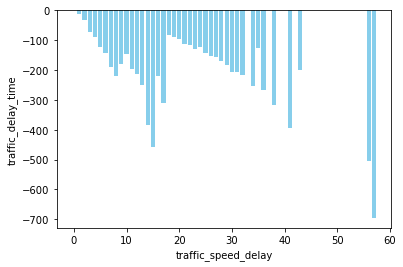

In [5]:
#plt.figure(figsize=(15, 6))
plt.bar(traffic_df['traffic_speed_delay'], traffic_df['traffic_delay_time'], color='skyblue')
plt.xlabel('traffic_speed_delay')
plt.ylabel('traffic_delay_time')
plt.show()

In [6]:
traffic_df['date'] = pd.to_datetime(traffic_df['date'])
traffic_df['time'] = traffic_df['date'].dt.strftime('%H:%M')
traffic_df

,date,lat,lng,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,confidence,street,description,traffic_speed_delay,traffic_delay_time,time
0,2024-06-17 10:30:00,34.026134,-118.476072,FRC5,14,22,63,40,false,1.000000,Highway Two,South-East of Colorado Ave and 20th ct,8,-23,10:30
1,2024-06-17 10:30:00,34.025625,-118.477830,FRC5,19,23,88,71,false,0.996659,Highway Two,North of Colordao Ave and 19th St,4,-17,10:30
2,2024-06-17 10:30:00,34.027802,-118.474187,FRC5,14,22,63,40,false,1.000000,Highway Two,South-West of Colorado Ave and Cloverfield Blvd,8,-23,10:30
3,2024-06-17 10:30:00,34.034930,-118.463976,FRC5,14,19,118,84,false,1.000000,Highway Two,West of Iowa Ave and S Centinela Ave,5,-34,10:30
4,2024-06-17 10:30:00,34.040547,-118.447410,FRC6,13,13,91,91,false,1.000000,Highway Two,South-East of Missouri Ave and Butler Ave,0,0,10:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14887,2024-06-26 13:00:00,34.043089,-118.463707,FRC5,21,23,59,53,false,1.000000,Bundy Dr,North-East of Rochester Ave and S Saltair Ave,2,-6,13:00
14888,2024-06-26 13:00:00,34.035352,-118.455888,FRC5,22,29,124,92,false,1.000000,Bundy Dr,South-East of Missouri Ave and Brockton Ave,7,-32,13:00
14889,2024-06-26 13:00:00,34.049826,-118.460853,FRC5,11,17,130,86,false,1.000000,Barrington Ave,North of Willshire Blvd and S Barrington Ave,6,-44,13:00
14890,2024-06-26 13:00:00,34.045697,-118.457263,FRC5,14,19,126,89,false,1.000000,Barrington Ave,South of Rochester Ave and Barry Ave,5,-37,13:00


In [7]:
avgSpeedForTime = traffic_df.groupby('time')['currentSpeed'].mean()
print(avgSpeedForTime)

time
00:00    23.225490
00:30    23.150327
01:00    23.369281
01:30    23.375817
02:00    23.529412
02:30    23.457516
03:00    23.441176
03:30    23.454248
04:00    23.500000
04:30    23.549020
05:00    23.398693
05:30    23.254902
06:00    23.254902
06:30    22.941176
07:00    22.290850
07:30    21.156863
08:00    20.232026
08:30    19.807190
09:00    18.983660
09:30    18.679739
10:00    19.114379
10:30    18.855882
11:00    19.158824
11:30    19.108824
12:00    18.500000
12:30    18.508824
13:00    18.297059
13:30    17.895425
14:00    18.303922
14:30    18.009804
15:00    17.516340
15:30    17.620915
16:00    17.725490
16:30    18.111111
17:00    18.271242
17:30    18.163399
18:00    18.977124
18:30    19.424837
19:00    19.866013
19:30    19.928105
20:00    20.529412
20:30    21.045752
21:00    21.346405
21:30    21.748366
22:00    22.251634
22:30    22.401961
23:00    23.026144
23:30    23.101307
Name: currentSpeed, dtype: float64


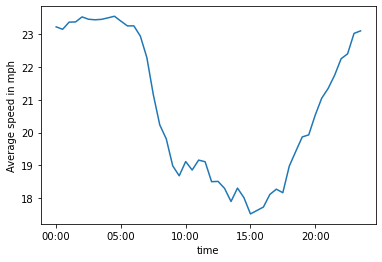

In [8]:
avgSpeedForTime.plot(x='Time', y='Speed', kind='line')
plt.ylabel("Average speed in mph")
plt.show()

In [9]:
avgTravelTimeForTime = traffic_df.groupby('time')['currentTravelTime'].mean()
print(avgTravelTimeForTime)

time
00:00     86.852941
00:30     86.973856
01:00     86.150327
01:30     85.751634
02:00     84.986928
02:30     85.411765
03:00     85.431373
03:30     85.385621
04:00     85.366013
04:30     84.934641
05:00     86.088235
05:30     86.496732
06:00     86.843137
06:30     88.372549
07:00     91.846405
07:30     98.908497
08:00    104.676471
08:30    107.647059
09:00    112.202614
09:30    113.797386
10:00    111.660131
10:30    115.044118
11:00    112.914706
11:30    113.676471
12:00    117.544118
12:30    118.535294
13:00    119.838235
13:30    123.294118
14:00    119.000000
14:30    120.349673
15:00    122.450980
15:30    121.359477
16:00    120.519608
16:30    116.836601
17:00    116.228758
17:30    117.852941
18:00    110.584967
18:30    108.669935
19:00    106.500000
19:30    104.751634
20:00    100.705882
20:30     98.352941
21:00     97.238562
21:30     93.774510
22:00     91.712418
22:30     91.584967
23:00     87.248366
23:30     87.117647
Name: currentTravelTime, dtype: flo

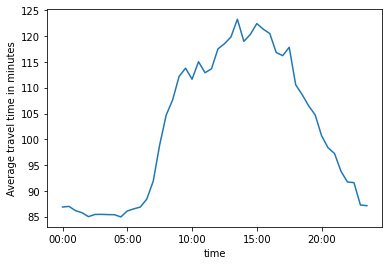

In [10]:
avgTravelTimeForTime.plot(x='Time', y='Travel time', kind='line')
plt.ylabel("Average travel time in minutes")
plt.show()

In [11]:
traffic_df

,date,lat,lng,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,confidence,street,description,traffic_speed_delay,traffic_delay_time,time
0,2024-06-17 10:30:00,34.026134,-118.476072,FRC5,14,22,63,40,false,1.000000,Highway Two,South-East of Colorado Ave and 20th ct,8,-23,10:30
1,2024-06-17 10:30:00,34.025625,-118.477830,FRC5,19,23,88,71,false,0.996659,Highway Two,North of Colordao Ave and 19th St,4,-17,10:30
2,2024-06-17 10:30:00,34.027802,-118.474187,FRC5,14,22,63,40,false,1.000000,Highway Two,South-West of Colorado Ave and Cloverfield Blvd,8,-23,10:30
3,2024-06-17 10:30:00,34.034930,-118.463976,FRC5,14,19,118,84,false,1.000000,Highway Two,West of Iowa Ave and S Centinela Ave,5,-34,10:30
4,2024-06-17 10:30:00,34.040547,-118.447410,FRC6,13,13,91,91,false,1.000000,Highway Two,South-East of Missouri Ave and Butler Ave,0,0,10:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14887,2024-06-26 13:00:00,34.043089,-118.463707,FRC5,21,23,59,53,false,1.000000,Bundy Dr,North-East of Rochester Ave and S Saltair Ave,2,-6,13:00
14888,2024-06-26 13:00:00,34.035352,-118.455888,FRC5,22,29,124,92,false,1.000000,Bundy Dr,South-East of Missouri Ave and Brockton Ave,7,-32,13:00
14889,2024-06-26 13:00:00,34.049826,-118.460853,FRC5,11,17,130,86,false,1.000000,Barrington Ave,North of Willshire Blvd and S Barrington Ave,6,-44,13:00
14890,2024-06-26 13:00:00,34.045697,-118.457263,FRC5,14,19,126,89,false,1.000000,Barrington Ave,South of Rochester Ave and Barry Ave,5,-37,13:00


In [12]:
traffic_df['CFspeedRatio'] = traffic_df['currentSpeed']/traffic_df['freeFlowSpeed']
traffic_df

,date,lat,lng,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,confidence,street,description,traffic_speed_delay,traffic_delay_time,time,CFspeedRatio
0,2024-06-17 10:30:00,34.026134,-118.476072,FRC5,14,22,63,40,false,1.000000,Highway Two,South-East of Colorado Ave and 20th ct,8,-23,10:30,0.636364
1,2024-06-17 10:30:00,34.025625,-118.477830,FRC5,19,23,88,71,false,0.996659,Highway Two,North of Colordao Ave and 19th St,4,-17,10:30,0.826087
2,2024-06-17 10:30:00,34.027802,-118.474187,FRC5,14,22,63,40,false,1.000000,Highway Two,South-West of Colorado Ave and Cloverfield Blvd,8,-23,10:30,0.636364
3,2024-06-17 10:30:00,34.034930,-118.463976,FRC5,14,19,118,84,false,1.000000,Highway Two,West of Iowa Ave and S Centinela Ave,5,-34,10:30,0.736842
4,2024-06-17 10:30:00,34.040547,-118.447410,FRC6,13,13,91,91,false,1.000000,Highway Two,South-East of Missouri Ave and Butler Ave,0,0,10:30,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14887,2024-06-26 13:00:00,34.043089,-118.463707,FRC5,21,23,59,53,false,1.000000,Bundy Dr,North-East of Rochester Ave and S Saltair Ave,2,-6,13:00,0.913043
14888,2024-06-26 13:00:00,34.035352,-118.455888,FRC5,22,29,124,92,false,1.000000,Bundy Dr,South-East of Missouri Ave and Brockton Ave,7,-32,13:00,0.758621
14889,2024-06-26 13:00:00,34.049826,-118.460853,FRC5,11,17,130,86,false,1.000000,Barrington Ave,North of Willshire Blvd and S Barrington Ave,6,-44,13:00,0.647059
14890,2024-06-26 13:00:00,34.045697,-118.457263,FRC5,14,19,126,89,false,1.000000,Barrington Ave,South of Rochester Ave and Barry Ave,5,-37,13:00,0.736842


In [13]:
avgCFSpeedRatioForTime = traffic_df.groupby('time')['CFspeedRatio'].mean()
print(avgCFSpeedRatioForTime)

time
00:00    0.980859
00:30    0.979059
01:00    0.984848
01:30    0.988523
02:00    0.996955
02:30    0.992880
03:00    0.992800
03:30    0.993403
04:00    0.994861
04:30    0.996464
05:00    0.987601
05:30    0.983766
06:00    0.981388
06:30    0.968959
07:00    0.934843
07:30    0.881290
08:00    0.844324
08:30    0.821949
09:00    0.791313
09:30    0.778836
10:00    0.787949
10:30    0.770145
11:00    0.786562
11:30    0.785406
12:00    0.768504
12:30    0.759305
13:00    0.748172
13:30    0.756244
14:00    0.745729
14:30    0.749011
15:00    0.745389
15:30    0.737405
16:00    0.747315
16:30    0.766254
17:00    0.761820
17:30    0.763082
18:00    0.793729
18:30    0.810194
19:00    0.826078
19:30    0.833479
20:00    0.859394
20:30    0.883962
21:00    0.898614
21:30    0.918974
22:00    0.937410
22:30    0.940232
23:00    0.972401
23:30    0.975711
Name: CFspeedRatio, dtype: float64


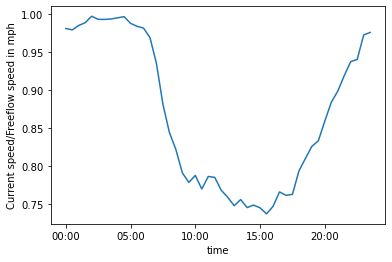

In [14]:
avgCFSpeedRatioForTime.plot(x='Time', y='CFspeedRatio', kind='line')
plt.ylabel("Current speed/Freeflow speed in mph")
plt.show()

# Polynomial Regression

In [15]:
import time

In [16]:
traffic_df

,date,lat,lng,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,confidence,street,description,traffic_speed_delay,traffic_delay_time,time,CFspeedRatio
0,2024-06-17 10:30:00,34.026134,-118.476072,FRC5,14,22,63,40,false,1.000000,Highway Two,South-East of Colorado Ave and 20th ct,8,-23,10:30,0.636364
1,2024-06-17 10:30:00,34.025625,-118.477830,FRC5,19,23,88,71,false,0.996659,Highway Two,North of Colordao Ave and 19th St,4,-17,10:30,0.826087
2,2024-06-17 10:30:00,34.027802,-118.474187,FRC5,14,22,63,40,false,1.000000,Highway Two,South-West of Colorado Ave and Cloverfield Blvd,8,-23,10:30,0.636364
3,2024-06-17 10:30:00,34.034930,-118.463976,FRC5,14,19,118,84,false,1.000000,Highway Two,West of Iowa Ave and S Centinela Ave,5,-34,10:30,0.736842
4,2024-06-17 10:30:00,34.040547,-118.447410,FRC6,13,13,91,91,false,1.000000,Highway Two,South-East of Missouri Ave and Butler Ave,0,0,10:30,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14887,2024-06-26 13:00:00,34.043089,-118.463707,FRC5,21,23,59,53,false,1.000000,Bundy Dr,North-East of Rochester Ave and S Saltair Ave,2,-6,13:00,0.913043
14888,2024-06-26 13:00:00,34.035352,-118.455888,FRC5,22,29,124,92,false,1.000000,Bundy Dr,South-East of Missouri Ave and Brockton Ave,7,-32,13:00,0.758621
14889,2024-06-26 13:00:00,34.049826,-118.460853,FRC5,11,17,130,86,false,1.000000,Barrington Ave,North of Willshire Blvd and S Barrington Ave,6,-44,13:00,0.647059
14890,2024-06-26 13:00:00,34.045697,-118.457263,FRC5,14,19,126,89,false,1.000000,Barrington Ave,South of Rochester Ave and Barry Ave,5,-37,13:00,0.736842


In [17]:
def time_to_dec(time):
    hour, minute = map(int, time.split(":"))
    
    #60 minutes in 1 hour
    time_val = hour + minute/60
    
    return time_val

In [18]:
traffic_df['hour'] = traffic_df['time'].apply(time_to_dec)
traffic_df

,date,lat,lng,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,confidence,street,description,traffic_speed_delay,traffic_delay_time,time,CFspeedRatio,hour
0,2024-06-17 10:30:00,34.026134,-118.476072,FRC5,14,22,63,40,false,1.000000,Highway Two,South-East of Colorado Ave and 20th ct,8,-23,10:30,0.636364,10.5
1,2024-06-17 10:30:00,34.025625,-118.477830,FRC5,19,23,88,71,false,0.996659,Highway Two,North of Colordao Ave and 19th St,4,-17,10:30,0.826087,10.5
2,2024-06-17 10:30:00,34.027802,-118.474187,FRC5,14,22,63,40,false,1.000000,Highway Two,South-West of Colorado Ave and Cloverfield Blvd,8,-23,10:30,0.636364,10.5
3,2024-06-17 10:30:00,34.034930,-118.463976,FRC5,14,19,118,84,false,1.000000,Highway Two,West of Iowa Ave and S Centinela Ave,5,-34,10:30,0.736842,10.5
4,2024-06-17 10:30:00,34.040547,-118.447410,FRC6,13,13,91,91,false,1.000000,Highway Two,South-East of Missouri Ave and Butler Ave,0,0,10:30,1.000000,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14887,2024-06-26 13:00:00,34.043089,-118.463707,FRC5,21,23,59,53,false,1.000000,Bundy Dr,North-East of Rochester Ave and S Saltair Ave,2,-6,13:00,0.913043,13.0
14888,2024-06-26 13:00:00,34.035352,-118.455888,FRC5,22,29,124,92,false,1.000000,Bundy Dr,South-East of Missouri Ave and Brockton Ave,7,-32,13:00,0.758621,13.0
14889,2024-06-26 13:00:00,34.049826,-118.460853,FRC5,11,17,130,86,false,1.000000,Barrington Ave,North of Willshire Blvd and S Barrington Ave,6,-44,13:00,0.647059,13.0
14890,2024-06-26 13:00:00,34.045697,-118.457263,FRC5,14,19,126,89,false,1.000000,Barrington Ave,South of Rochester Ave and Barry Ave,5,-37,13:00,0.736842,13.0


In [19]:
features = ['freeFlowSpeed', 'currentTravelTime', 'freeFlowTravelTime','hour','lat','lng']

X = traffic_df[features]
y = traffic_df['currentSpeed']

In [20]:
X.head()

,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,hour,lat,lng
0,22,63,40,10.5,34.026134,-118.476072
1,23,88,71,10.5,34.025625,-118.477830
2,22,63,40,10.5,34.027802,-118.474187
3,19,118,84,10.5,34.034930,-118.463976
4,13,91,91,10.5,34.040547,-118.447410


In [21]:
y.head()

0    14
1    19
2    14
3    14
4    13
Name: currentSpeed, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [24]:
start_time = time.time()
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

In [25]:
#X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()

In [26]:
start_time = time.time()
poly_reg.fit(X_poly, y)
end_time = time.time()

training_duration = end_time - start_time
print(f"Training duration: {training_duration:.4f} seconds")

Training duration: 0.1560 seconds


In [27]:
y_pred = poly_reg.predict(X_poly)
print(y_pred)

[14.22024848 18.72760417 14.19414403 ... 11.45472552 13.5478356
 18.49616219]


In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print(mse)

0.09639080949083227


In [29]:
import timeit

In [30]:
for i in range(1,5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)
    degree = i
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    poly_reg = LinearRegression()
    
    start_time = time.time()
    poly_reg.fit(X_poly, y)
    end_time = time.time()
    
    training_duration = end_time - start_time
    print(f"Training duration: {training_duration:.4f} seconds")
    
    y_pred = poly_reg.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    print(mse)


Training duration: 0.0030 seconds
5.207691851326051
Training duration: 0.0060 seconds
1.0899840399354213
Training duration: 0.0310 seconds
0.28065535072066594
Training duration: 0.2651 seconds
0.09639080949083227


Using quadratic regression, we get a MSE of 1.26 mph which means that linear regression on average will have a 1.26 mph error when trying to predict the current speed on the highway.

MSE for each degree.
Quadratic: 1.26
Cubic: 0.35
Quartic:0.123

Degree of 4 is the maximum used to prevent overfitting.

In [31]:
print(X.shape)
print(y.shape)
print(X_poly.shape)
print(y_pred.shape)

(14892, 6)
(14892,)
(14892, 210)
(14892,)


# Traffic Classification

In [32]:
def isTrafficBad(CFspeedRatio):
    if CFspeedRatio < 0.4:
        return "Bad"
    elif CFspeedRatio < 0.6:
        return "Moderate"
    elif CFspeedRatio < 0.85:
        return "Mild"
    else:
        return "None"

In [33]:
traffic_df['currentTraffic'] = traffic_df['CFspeedRatio'].apply(isTrafficBad)
traffic_df

,date,lat,lng,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,confidence,street,description,traffic_speed_delay,traffic_delay_time,time,CFspeedRatio,hour,currentTraffic
0,2024-06-17 10:30:00,34.026134,-118.476072,FRC5,14,22,63,40,false,1.000000,Highway Two,South-East of Colorado Ave and 20th ct,8,-23,10:30,0.636364,10.5,Mild
1,2024-06-17 10:30:00,34.025625,-118.477830,FRC5,19,23,88,71,false,0.996659,Highway Two,North of Colordao Ave and 19th St,4,-17,10:30,0.826087,10.5,Mild
2,2024-06-17 10:30:00,34.027802,-118.474187,FRC5,14,22,63,40,false,1.000000,Highway Two,South-West of Colorado Ave and Cloverfield Blvd,8,-23,10:30,0.636364,10.5,Mild
3,2024-06-17 10:30:00,34.034930,-118.463976,FRC5,14,19,118,84,false,1.000000,Highway Two,West of Iowa Ave and S Centinela Ave,5,-34,10:30,0.736842,10.5,Mild
4,2024-06-17 10:30:00,34.040547,-118.447410,FRC6,13,13,91,91,false,1.000000,Highway Two,South-East of Missouri Ave and Butler Ave,0,0,10:30,1.000000,10.5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14887,2024-06-26 13:00:00,34.043089,-118.463707,FRC5,21,23,59,53,false,1.000000,Bundy Dr,North-East of Rochester Ave and S Saltair Ave,2,-6,13:00,0.913043,13.0,None
14888,2024-06-26 13:00:00,34.035352,-118.455888,FRC5,22,29,124,92,false,1.000000,Bundy Dr,South-East of Missouri Ave and Brockton Ave,7,-32,13:00,0.758621,13.0,Mild
14889,2024-06-26 13:00:00,34.049826,-118.460853,FRC5,11,17,130,86,false,1.000000,Barrington Ave,North of Willshire Blvd and S Barrington Ave,6,-44,13:00,0.647059,13.0,Mild
14890,2024-06-26 13:00:00,34.045697,-118.457263,FRC5,14,19,126,89,false,1.000000,Barrington Ave,South of Rochester Ave and Barry Ave,5,-37,13:00,0.736842,13.0,Mild


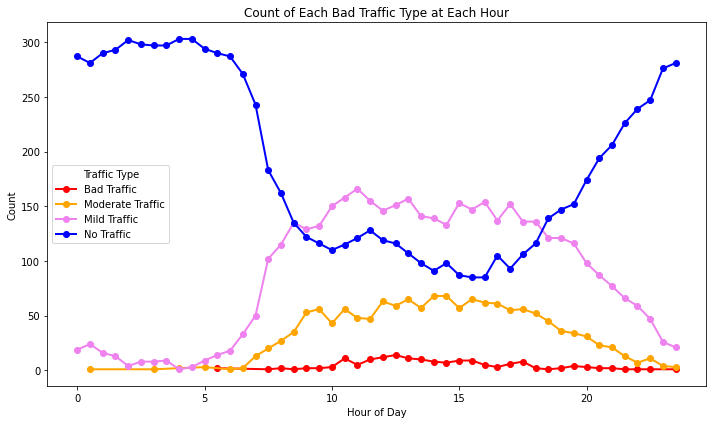

In [34]:
bad_traffic_df = traffic_df[traffic_df['currentTraffic'] == 'Bad']
moderate_traffic_df = traffic_df[traffic_df['currentTraffic'] == 'Moderate']
mild_traffic_df = traffic_df[traffic_df['currentTraffic'] == 'Mild']
none_traffic_df = traffic_df[traffic_df['currentTraffic'] == 'None']


bad_traffic_counts = bad_traffic_df.groupby('hour').size().reset_index(name='count')
moderate_traffic_counts = moderate_traffic_df.groupby('hour').size().reset_index(name='count')
mild_traffic_counts = mild_traffic_df.groupby('hour').size().reset_index(name='count')
none_traffic_counts = none_traffic_df.groupby('hour').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.plot(bad_traffic_counts['hour'], bad_traffic_counts['count'], color='red', marker='o', linestyle='-', linewidth=2, label='Bad Traffic')
plt.plot(moderate_traffic_counts['hour'], moderate_traffic_counts['count'], color='orange', marker='o', linestyle='-', linewidth=2, label='Moderate Traffic')
plt.plot(mild_traffic_counts['hour'], mild_traffic_counts['count'], color='violet', marker='o', linestyle='-', linewidth=2, label='Mild Traffic')
plt.plot(none_traffic_counts['hour'], none_traffic_counts['count'], color='blue', marker='o', linestyle='-', linewidth=2, label='No Traffic')



plt.title('Count of Each Bad Traffic Type at Each Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title="Traffic Type")

plt.show()

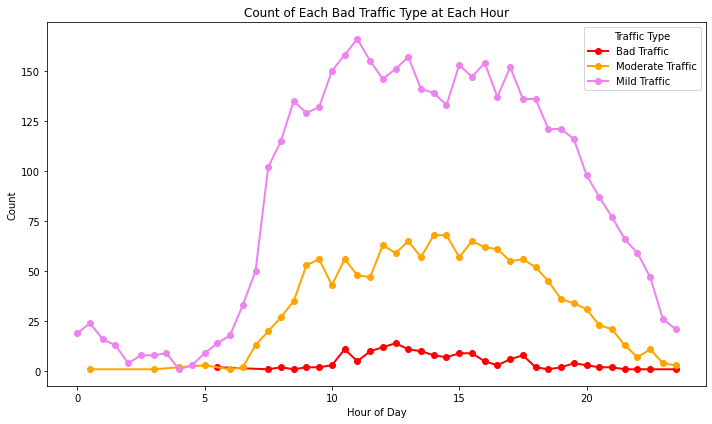

In [71]:
bad_traffic_df = traffic_df[traffic_df['currentTraffic'] == 'Bad']
moderate_traffic_df = traffic_df[traffic_df['currentTraffic'] == 'Moderate']
mild_traffic_df = traffic_df[traffic_df['currentTraffic'] == 'Mild']
#none_traffic_df = traffic_df[traffic_df['currentTraffic'] == 'None']


bad_traffic_counts = bad_traffic_df.groupby('hour').size().reset_index(name='count')
moderate_traffic_counts = moderate_traffic_df.groupby('hour').size().reset_index(name='count')
mild_traffic_counts = mild_traffic_df.groupby('hour').size().reset_index(name='count')
#none_traffic_counts = none_traffic_df.groupby('hour').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.plot(bad_traffic_counts['hour'], bad_traffic_counts['count'], color='red', marker='o', linestyle='-', linewidth=2, label='Bad Traffic')
plt.plot(moderate_traffic_counts['hour'], moderate_traffic_counts['count'], color='orange', marker='o', linestyle='-', linewidth=2, label='Moderate Traffic')
plt.plot(mild_traffic_counts['hour'], mild_traffic_counts['count'], color='violet', marker='o', linestyle='-', linewidth=2, label='Mild Traffic')
#plt.plot(none_traffic_counts['hour'], none_traffic_counts['count'], color='blue', marker='o', linestyle='-', linewidth=2, label='No Traffic')



plt.title('Count of Each Bad Traffic Type at Each Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title="Traffic Type")

plt.show()

How much of each traffic type is recorded at each hour of the day

Text(0, 0.5, 'Bad Traffic Count')

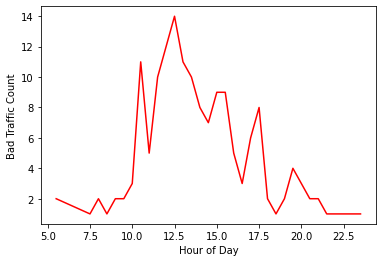

In [35]:
plt.plot(bad_traffic_counts['hour'], bad_traffic_counts['count'], color='red')
plt.xlabel('Hour of Day') 
plt.ylabel('Bad Traffic Count')

In [36]:
traffic_df.head()

,date,lat,lng,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,confidence,street,description,traffic_speed_delay,traffic_delay_time,time,CFspeedRatio,hour,currentTraffic
0,2024-06-17 10:30:00,34.026134,-118.476072,FRC5,14,22,63,40,false,1.000000,Highway Two,South-East of Colorado Ave and 20th ct,8,-23,10:30,0.636364,10.5,Mild
1,2024-06-17 10:30:00,34.025625,-118.477830,FRC5,19,23,88,71,false,0.996659,Highway Two,North of Colordao Ave and 19th St,4,-17,10:30,0.826087,10.5,Mild
2,2024-06-17 10:30:00,34.027802,-118.474187,FRC5,14,22,63,40,false,1.000000,Highway Two,South-West of Colorado Ave and Cloverfield Blvd,8,-23,10:30,0.636364,10.5,Mild
3,2024-06-17 10:30:00,34.034930,-118.463976,FRC5,14,19,118,84,false,1.000000,Highway Two,West of Iowa Ave and S Centinela Ave,5,-34,10:30,0.736842,10.5,Mild
4,2024-06-17 10:30:00,34.040547,-118.447410,FRC6,13,13,91,91,false,1.000000,Highway Two,South-East of Missouri Ave and Butler Ave,0,0,10:30,1.000000,10.5,None


In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
k = 2
knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')

In [39]:
feature_cols = ['traffic_speed_delay','traffic_delay_time','CFspeedRatio','hour','lat','lng']

X = traffic_df[feature_cols]
y = traffic_df['currentTraffic']

knn.fit(X,y)

KNeighborsClassifier(n_neighbors=2)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [41]:
print(X_train.shape)
print(y_train.shape)

(10424, 6)
(10424,)


In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [43]:
y_predict = knn.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_predict)

print(accuracy)

0.9518800358102059


In [45]:
traffic_df.head()

,date,lat,lng,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,confidence,street,description,traffic_speed_delay,traffic_delay_time,time,CFspeedRatio,hour,currentTraffic
0,2024-06-17 10:30:00,34.026134,-118.476072,FRC5,14,22,63,40,false,1.000000,Highway Two,South-East of Colorado Ave and 20th ct,8,-23,10:30,0.636364,10.5,Mild
1,2024-06-17 10:30:00,34.025625,-118.477830,FRC5,19,23,88,71,false,0.996659,Highway Two,North of Colordao Ave and 19th St,4,-17,10:30,0.826087,10.5,Mild
2,2024-06-17 10:30:00,34.027802,-118.474187,FRC5,14,22,63,40,false,1.000000,Highway Two,South-West of Colorado Ave and Cloverfield Blvd,8,-23,10:30,0.636364,10.5,Mild
3,2024-06-17 10:30:00,34.034930,-118.463976,FRC5,14,19,118,84,false,1.000000,Highway Two,West of Iowa Ave and S Centinela Ave,5,-34,10:30,0.736842,10.5,Mild
4,2024-06-17 10:30:00,34.040547,-118.447410,FRC6,13,13,91,91,false,1.000000,Highway Two,South-East of Missouri Ave and Butler Ave,0,0,10:30,1.000000,10.5,None


In [46]:
import time
feature_cols = ['traffic_speed_delay','traffic_delay_time','hour', 'lat','lng']

X = traffic_df[feature_cols]
y = traffic_df['currentTraffic']

k_vals = [1,3,5,11,15,27,43]
accuracies = []

for a in range(0,len(k_vals)):
    knn = KNeighborsClassifier(n_neighbors=k_vals[a], weights='uniform')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)
    
    start_time = time.time()
    
    knn.fit(X_train, y_train)
    
    end_time = time.time()
    
    training_duration = end_time - start_time
    print(f"Training duration: {training_duration:.4f} seconds")
    
    y_predict = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    accuracies.append(accuracy)

for y in range(0,len(accuracies)):
    print(k_vals[y], accuracies[y])

Training duration: 0.0240 seconds
Training duration: 0.0230 seconds
Training duration: 0.0270 seconds
Training duration: 0.0250 seconds
Training duration: 0.0300 seconds
Training duration: 0.0330 seconds
Training duration: 0.0250 seconds
1 0.9617497456765005
3 0.9446592065106816
5 0.9403865717192269
11 0.9346897253306206
15 0.9287894201424212
27 0.9184130213631739
43 0.9161749745676501


In [47]:
from datetime import datetime
traffic_df['day_of_week'] = pd.to_datetime(traffic_df['date'])

traffic_df['day_of_week'] = traffic_df['day_of_week'].dt.weekday + 1
traffic_df.head()

,date,lat,lng,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,confidence,street,description,traffic_speed_delay,traffic_delay_time,time,CFspeedRatio,hour,currentTraffic,day_of_week
0,2024-06-17 10:30:00,34.026134,-118.476072,FRC5,14,22,63,40,false,1.000000,Highway Two,South-East of Colorado Ave and 20th ct,8,-23,10:30,0.636364,10.5,Mild,1
1,2024-06-17 10:30:00,34.025625,-118.477830,FRC5,19,23,88,71,false,0.996659,Highway Two,North of Colordao Ave and 19th St,4,-17,10:30,0.826087,10.5,Mild,1
2,2024-06-17 10:30:00,34.027802,-118.474187,FRC5,14,22,63,40,false,1.000000,Highway Two,South-West of Colorado Ave and Cloverfield Blvd,8,-23,10:30,0.636364,10.5,Mild,1
3,2024-06-17 10:30:00,34.034930,-118.463976,FRC5,14,19,118,84,false,1.000000,Highway Two,West of Iowa Ave and S Centinela Ave,5,-34,10:30,0.736842,10.5,Mild,1
4,2024-06-17 10:30:00,34.040547,-118.447410,FRC6,13,13,91,91,false,1.000000,Highway Two,South-East of Missouri Ave and Butler Ave,0,0,10:30,1.000000,10.5,None,1


In [48]:
import time
feature_cols = ['freeFlowSpeed','freeFlowTravelTime','hour', 'lat','lng', 'day_of_week']

X = traffic_df[feature_cols]
y = traffic_df['currentTraffic']

k_vals = [1,3,5,11,15,27,43]
accuracies = []

for a in range(0,len(k_vals)):
    knn = KNeighborsClassifier(n_neighbors=k_vals[a], weights='uniform')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)
    
    start_time = time.time()
    
    knn.fit(X_train, y_train)
    
    end_time = time.time()
    
    training_duration = end_time - start_time
    print(f"Training duration: {training_duration:.4f} seconds")
    
    y_predict = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    accuracies.append(accuracy)

for y in range(0,len(accuracies)):
    print(k_vals[y], accuracies[y])

Training duration: 0.0200 seconds
Training duration: 0.0210 seconds
Training duration: 0.0250 seconds
Training duration: 0.0200 seconds
Training duration: 0.0210 seconds
Training duration: 0.0220 seconds
Training duration: 0.0200 seconds
1 0.7977619532044761
3 0.7914547304170906
5 0.7965412004069176
11 0.7945066124109867
15 0.794913530010173
27 0.7855544252288912
43 0.7798575788402848


# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
feature_cols = ['traffic_speed_delay','traffic_delay_time','hour', 'lat','lng']

X = traffic_df[feature_cols]
y = traffic_df['currentTraffic'] 

In [51]:
decisiontree = DecisionTreeClassifier()

In [52]:
decisiontree.fit(X, y)

DecisionTreeClassifier()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [54]:
start_time = time.time()
decisiontree.fit(X_train, y_train)
end_time = time.time()

training_duration = end_time - start_time
print(f"Training duration: {training_duration:.4f} seconds")

Training duration: 0.0140 seconds


In [55]:
y_predict = decisiontree.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)

print(accuracy)

0.9979654120040692


In [56]:
traffic_df.head()

,date,lat,lng,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,confidence,street,description,traffic_speed_delay,traffic_delay_time,time,CFspeedRatio,hour,currentTraffic,day_of_week
0,2024-06-17 10:30:00,34.026134,-118.476072,FRC5,14,22,63,40,false,1.000000,Highway Two,South-East of Colorado Ave and 20th ct,8,-23,10:30,0.636364,10.5,Mild,1
1,2024-06-17 10:30:00,34.025625,-118.477830,FRC5,19,23,88,71,false,0.996659,Highway Two,North of Colordao Ave and 19th St,4,-17,10:30,0.826087,10.5,Mild,1
2,2024-06-17 10:30:00,34.027802,-118.474187,FRC5,14,22,63,40,false,1.000000,Highway Two,South-West of Colorado Ave and Cloverfield Blvd,8,-23,10:30,0.636364,10.5,Mild,1
3,2024-06-17 10:30:00,34.034930,-118.463976,FRC5,14,19,118,84,false,1.000000,Highway Two,West of Iowa Ave and S Centinela Ave,5,-34,10:30,0.736842,10.5,Mild,1
4,2024-06-17 10:30:00,34.040547,-118.447410,FRC6,13,13,91,91,false,1.000000,Highway Two,South-East of Missouri Ave and Butler Ave,0,0,10:30,1.000000,10.5,None,1


In [57]:
unique_streets = traffic_df['street'].unique()

In [58]:
print(unique_streets)

[' Highway Two' ' Willshire Blvd' ' Highway Ten' ' Fourth St'
 ' Lincoln Blvd' ' Fourteenth St' ' Twentieth St' ' Twenty-Sixth St'
 ' Bundy Dr' ' Barrington Ave']


In [59]:
import folium

In [60]:
street_features = ['street','lat','lng']
streets = traffic_df[street_features]
print(streets)

                street        lat         lng
0          Highway Two  34.026134 -118.476072
1          Highway Two  34.025625 -118.477830
2          Highway Two  34.027802 -118.474187
3          Highway Two  34.034930 -118.463976
4          Highway Two  34.040547 -118.447410
...                ...        ...         ...
14887         Bundy Dr  34.043089 -118.463707
14888         Bundy Dr  34.035352 -118.455888
14889   Barrington Ave  34.049826 -118.460853
14890   Barrington Ave  34.045697 -118.457263
14891   Barrington Ave  34.041474 -118.454371

[14892 rows x 3 columns]


In [61]:
mymap = folium.Map(location=[34.026134,-118.476072], zoom_start=10)

In [62]:
folium.CircleMarker(location = [34.026134,-118.476072],
                    radius = 50, popup = ' FRI ').add_to(mymap)

In [63]:
mymap

In [64]:
mymap = folium.Map(location=[34.043089,-118.463707], zoom_start=150)

In [65]:
mymap

Average speed on a Street

In [66]:
traffic_df.head()

,date,lat,lng,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,confidence,street,description,traffic_speed_delay,traffic_delay_time,time,CFspeedRatio,hour,currentTraffic,day_of_week
0,2024-06-17 10:30:00,34.026134,-118.476072,FRC5,14,22,63,40,false,1.000000,Highway Two,South-East of Colorado Ave and 20th ct,8,-23,10:30,0.636364,10.5,Mild,1
1,2024-06-17 10:30:00,34.025625,-118.477830,FRC5,19,23,88,71,false,0.996659,Highway Two,North of Colordao Ave and 19th St,4,-17,10:30,0.826087,10.5,Mild,1
2,2024-06-17 10:30:00,34.027802,-118.474187,FRC5,14,22,63,40,false,1.000000,Highway Two,South-West of Colorado Ave and Cloverfield Blvd,8,-23,10:30,0.636364,10.5,Mild,1
3,2024-06-17 10:30:00,34.034930,-118.463976,FRC5,14,19,118,84,false,1.000000,Highway Two,West of Iowa Ave and S Centinela Ave,5,-34,10:30,0.736842,10.5,Mild,1
4,2024-06-17 10:30:00,34.040547,-118.447410,FRC6,13,13,91,91,false,1.000000,Highway Two,South-East of Missouri Ave and Butler Ave,0,0,10:30,1.000000,10.5,None,1


In [67]:
avgTrafficSpeed = traffic_df.groupby(['street', 'time'])['currentSpeed'].mean().reset_index()
avgTrafficSpeed

,street,time,currentSpeed
0,Barrington Ave,00:00,20.296296
1,Barrington Ave,00:30,20.222222
2,Barrington Ave,01:00,20.333333
3,Barrington Ave,01:30,20.666667
4,Barrington Ave,02:00,20.666667
...,...,...,...
475,Willshire Blvd,21:30,16.222222
476,Willshire Blvd,22:00,16.587302
477,Willshire Blvd,22:30,16.619048
478,Willshire Blvd,23:00,17.126984


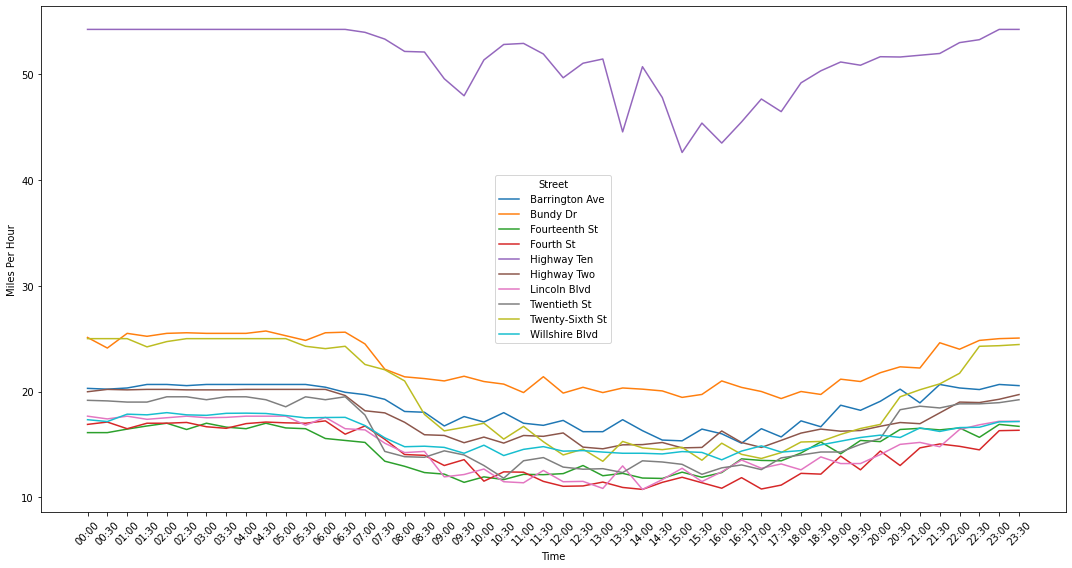

In [68]:
plt.figure(figsize=(15, 8))

for street in avgTrafficSpeed['street'].unique():
    street_data = avgTrafficSpeed[avgTrafficSpeed['street'] == street]
    plt.plot(street_data['time'], street_data['currentSpeed'], label=street)
    
plt.xlabel('Time')
plt.ylabel('Miles Per Hour')

plt.xticks(rotation=45)

plt.legend(title="Street")

plt.tight_layout()
plt.show()

In [69]:
freeway_coordinates = [
    [34.012706, -118.489559],  
    [34.023020, -118.474749],  
    [34.031863, -118.414200],
    [34.029251, -118.395079],
    [34.037030, -118.378658],
    [34.033852, -118.361901],
    [34.038208, -118.274193],
    [34.023669, -118.243367],
    [34.029590, -118.224161],
    [34.055325, -118.213772],
    [34.072242, -118.072799]  
]

m = folium.Map(location=freeway_coordinates[0], zoom_start=12)

folium.PolyLine(
    freeway_coordinates,
    color="blue",    # Line color
    weight=4,        # Line width
    opacity=0.7      # Line opacity
).add_to(m)

folium.Marker(freeway_coordinates[0], popup="Start").add_to(m)
folium.Marker(freeway_coordinates[-1], popup="End").add_to(m)
m